In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta

In [24]:
file_path = '../data/yfinance_data/AMZN_historical_data.csv'

df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6846 non-null   datetime64[ns]
 1   Open          6846 non-null   float64       
 2   High          6846 non-null   float64       
 3   Low           6846 non-null   float64       
 4   Close         6846 non-null   float64       
 5   Adj Close     6846 non-null   float64       
 6   Volume        6846 non-null   int64         
 7   Dividends     6846 non-null   float64       
 8   Stock Splits  6846 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 481.5 KB


RangeIndex(start=0, stop=6846, step=1)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


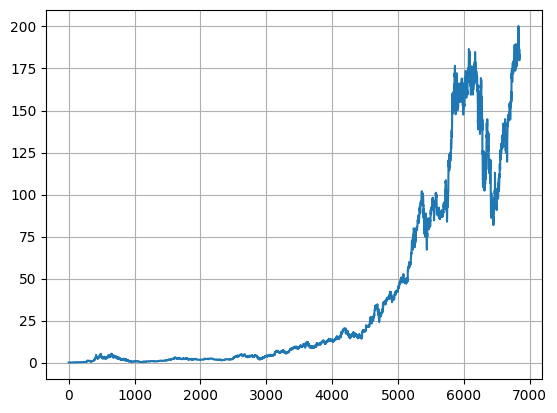

In [26]:
print(df.index)

print(df.columns)

ts = df['Close'][-10:]

sample = df.sample(20)


df['Close'].plot(grid=True)

plt.show()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
df['EMA_20'] = ta.EMA(df['Close'], timeperiod=20)
df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

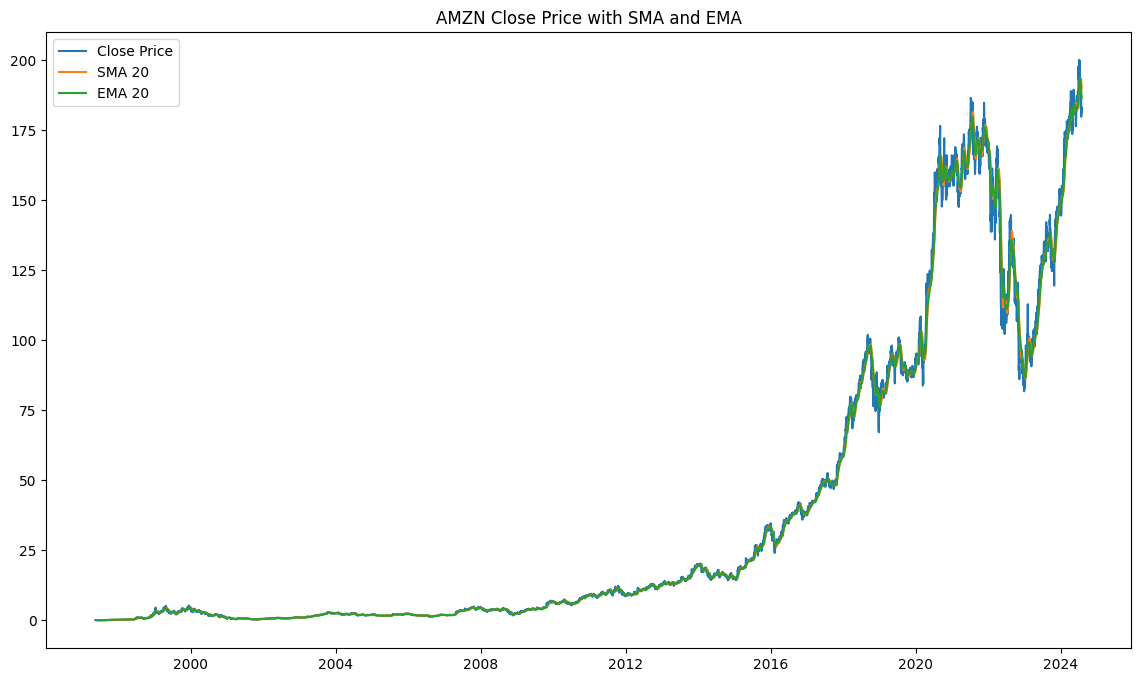

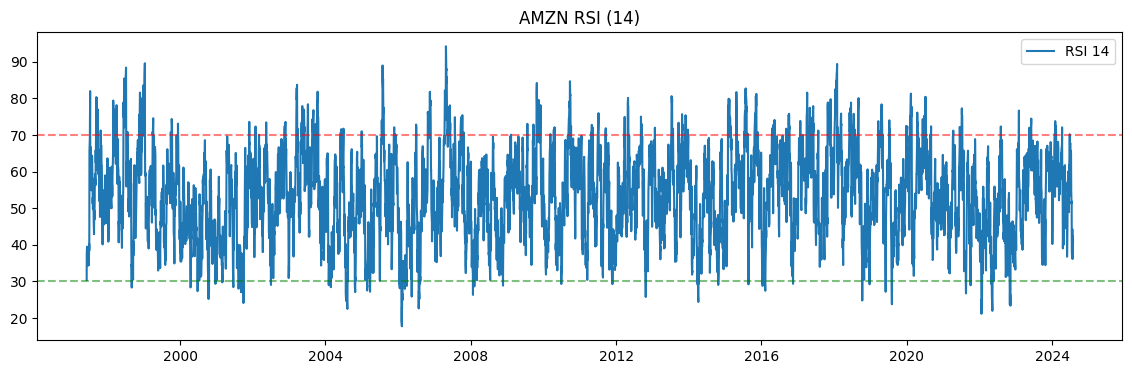

c:\Users\Bisrat\Desktop\financial-news-sentiment-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


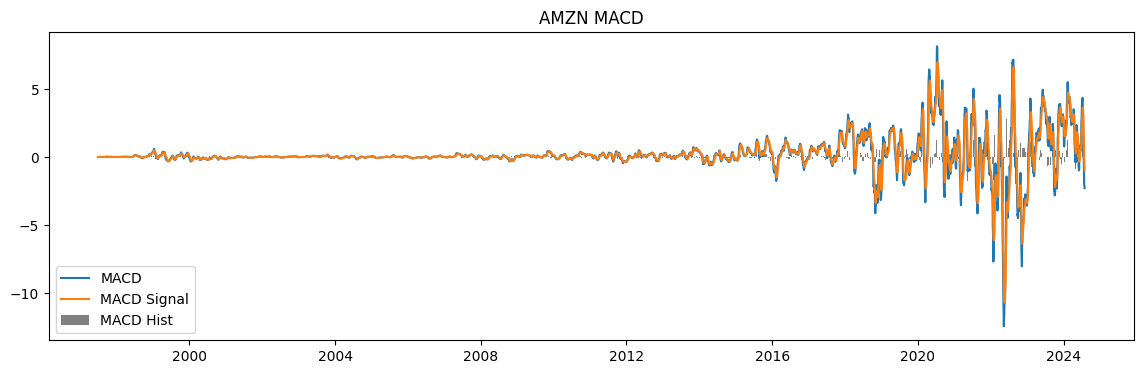

In [13]:
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='SMA 20')
plt.plot(df.index, df['EMA_20'], label='EMA 20')
plt.title('AMZN Close Price with SMA and EMA')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df.index, df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AMZN RSI (14)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df.index, df['MACD'], label='MACD')
plt.plot(df.index, df['MACD_signal'], label='MACD Signal')
plt.bar(df.index, df['MACD_hist'], label='MACD Hist', color='gray')
plt.title('AMZN MACD')
plt.legend()
plt.show()

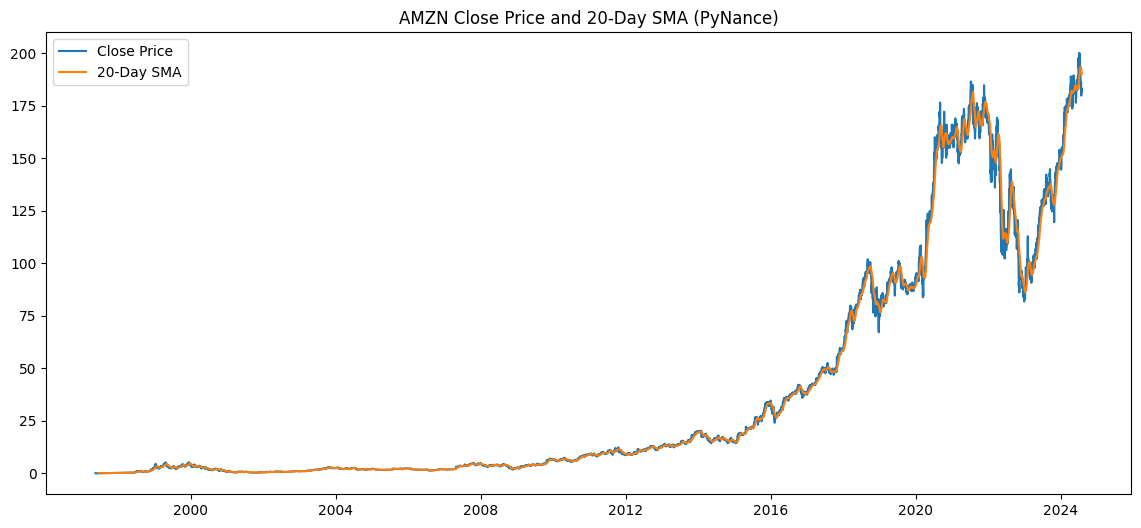

In [14]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA')
plt.title('AMZN Close Price and 20-Day SMA (PyNance)')
plt.legend()
plt.show()

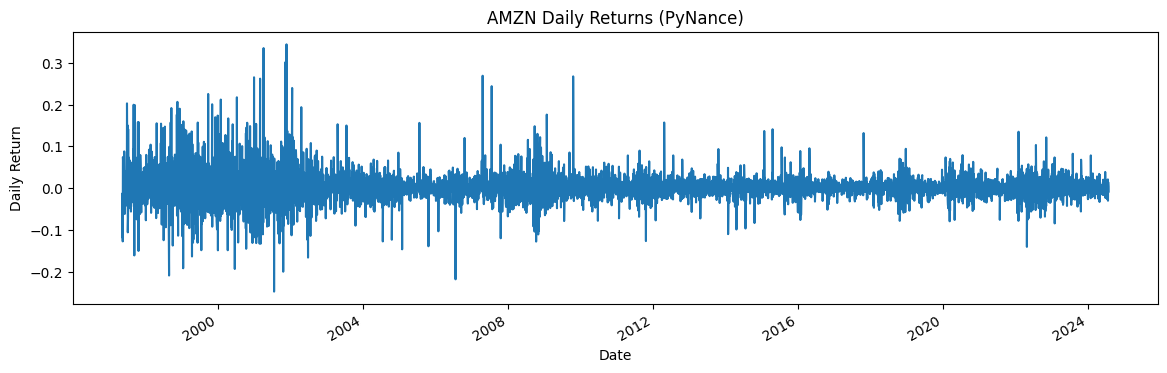

In [ ]:
df['daily_return'] = df['Close'].pct_change()
df['daily_return'].plot(figsize=(14, 4), title='AMZN Daily Returns (PyNance)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [ ]:
daily_close = df[['Adj Close']]
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)
print(daily_pct_c)
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns)

            Adj Close
Date                 
1997-05-15   0.000000
1997-05-16  -0.117028
1997-05-19  -0.012040
1997-05-20  -0.042685
1997-05-21  -0.127392
...               ...
2024-07-24  -0.029934
2024-07-25  -0.005419
2024-07-26   0.014734
2024-07-29   0.003836
2024-07-30  -0.008133

[6846 rows x 1 columns]
            Adj Close
Date                 
1997-05-15        NaN
1997-05-16  -0.124461
1997-05-19  -0.012114
1997-05-20  -0.043623
1997-05-21  -0.136269
...               ...
2024-07-24  -0.030391
2024-07-25  -0.005434
2024-07-26   0.014627
2024-07-29   0.003828
2024-07-30  -0.008166

[6846 rows x 1 columns]


In [ ]:
monthly = df.resample('BME').apply(lambda x: x[-1])
monthly.pct_change()
quarter = df.resample("4ME").mean()
quarter.pct_change()

C:\Users\Bisrat\AppData\Local\Temp\ipykernel_11488\2852625546.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = df.resample('BME').apply(lambda x: x[-1])


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,daily_return
Date,,,,,,,,,,,,,,,
1997-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-30,0.386762,0.414564,0.473927,0.488716,0.488716,-0.762538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.597817
1998-01-31,0.919835,0.901488,0.928487,0.901894,0.901894,0.174658,NaN,NaN,1.035390,0.989683,-0.015750,-0.197438,0.086989,-1.595211,-0.820694
1998-05-31,0.515480,0.507653,0.522921,0.514566,0.514566,1.537742,NaN,NaN,0.485323,0.492466,0.100981,0.710271,0.554884,-0.684284,1.155557
1998-09-30,1.415035,1.472990,1.372604,1.430004,1.430004,1.601781,NaN,inf,1.390462,1.385932,-0.034198,2.109473,2.132304,3.118606,1.373467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,0.049441,0.046918,0.055956,0.052306,0.052306,-0.182281,NaN,NaN,0.004804,0.000812,0.282126,-1.492021,-1.427077,-0.739077,-4.239957
2023-09-30,0.288118,0.283574,0.290528,0.285027,0.285027,-0.147731,NaN,NaN,0.293310,0.290281,0.024718,0.550185,0.791023,-4.020125,-0.620393
2024-01-31,0.083743,0.083700,0.086098,0.086650,0.086650,-0.107311,NaN,NaN,0.082108,0.085404,-0.009426,-0.366689,-0.485728,-1.706326,2.100250


In [ ]:
daily_pct_c = daily_close / daily_close.shift(1) - 1
print(daily_pct_c)

            Adj Close
Date                 
1997-05-15        NaN
1997-05-16  -0.117028
1997-05-19  -0.012040
1997-05-20  -0.042685
1997-05-21  -0.127392
...               ...
2024-07-24  -0.029934
2024-07-25  -0.005419
2024-07-26   0.014734
2024-07-29   0.003836
2024-07-30  -0.008133

[6846 rows x 1 columns]


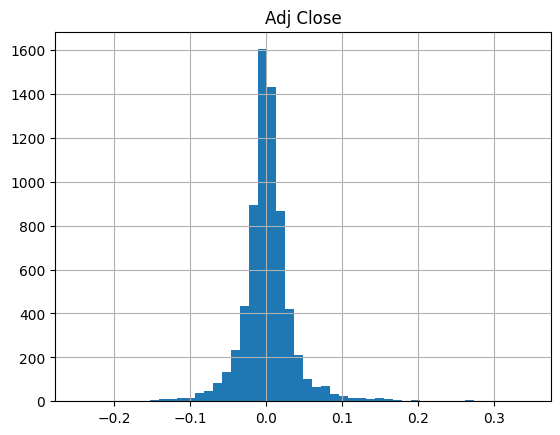

         Adj Close
count  6845.000000
mean      0.001716
std       0.035429
min      -0.247661
25%      -0.013028
50%       0.000409
75%       0.014671
max       0.344714


In [ ]:
daily_pct_c.hist(bins=50)
plt.show()

print(daily_pct_c.describe())

In [ ]:
cum_daily_return = (1 + daily_pct_c).cumprod()
print(cum_daily_return)

              Adj Close
Date                   
1997-05-15          NaN
1997-05-16     0.882972
1997-05-19     0.872341
1997-05-20     0.835105
1997-05-21     0.728719
...                 ...
2024-07-24  1846.768238
2024-07-25  1836.759805
2024-07-26  1863.823481
2024-07-29  1870.972362
2024-07-30  1855.755492

[6846 rows x 1 columns]


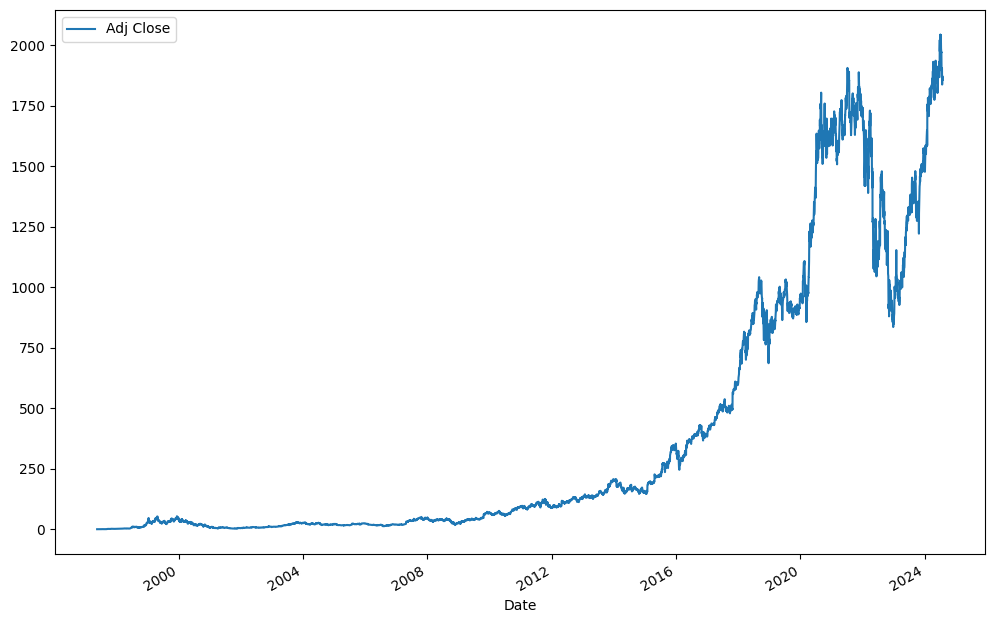

In [ ]:
cum_daily_return.plot(figsize=(12,8))
plt.show()